In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [2]:
path = 'task4-dataset.csv'
data = pd.read_csv(path)
df = pd.DataFrame(data)
df.head()

,Unnamed: 0,semester,gender,height,age,study,likes_pinapple_on_pizza,likes_chocolate,english_skills,books_per_year
0,0,99.0,0.0,NaN,27.0,2.0,1.0,1.0,83.0,9.0
1,1,28.0,0.0,175.0,34.0,3.0,1.0,1.0,80.0,1.0
2,2,-1.0,0.0,NaN,22.0,4.0,1.0,unkwn,88.0,7.0
3,3,4.0,1.0,168.0,22.0,0.0,NaN,1.0,89.0,5.0
4,4,13.0,0.0,NaN,25.0,0.0,0.0,0.0,NaN,7.0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Unnamed: 0               1000 non-null   int64  
 1   semester                 1000 non-null   float64
 2   gender                   1000 non-null   float64
 3   height                   830 non-null    float64
 4   age                      1000 non-null   float64
 5   study                    1000 non-null   float64
 6   likes_pinapple_on_pizza  754 non-null    float64
 7   likes_chocolate          1000 non-null   object 
 8   english_skills           823 non-null    float64
 9   books_per_year           1000 non-null   float64
dtypes: float64(8), int64(1), object(1)
memory usage: 78.2+ KB


In [4]:
df.isnull().sum()

Unnamed: 0                   0
semester                     0
gender                       0
height                     170
age                          0
study                        0
likes_pinapple_on_pizza    246
likes_chocolate              0
english_skills             177
books_per_year               0
dtype: int64

In [5]:
df.describe()

,Unnamed: 0,semester,gender,height,age,study,likes_pinapple_on_pizza,english_skills,books_per_year
count,1000.000000,1000.0000,1000.00000,830.000000,1000.000000,1000.000000,754.000000,823.000000,1000.000000
mean,499.500000,26.1560,0.29200,172.161446,25.763000,1.892000,0.360743,87.009721,3.941000
std,288.819436,34.5585,0.45491,8.029377,3.201731,1.818142,0.480535,7.893907,2.560092
min,0.000000,-7.0000,0.00000,141.000000,20.000000,0.000000,0.000000,52.000000,0.000000
25%,249.750000,6.0000,0.00000,167.000000,23.000000,0.000000,0.000000,82.000000,2.000000
50%,499.500000,12.0000,0.00000,173.000000,25.000000,1.000000,0.000000,88.000000,3.000000
75%,749.250000,20.0000,1.00000,179.000000,28.000000,4.000000,1.000000,93.000000,6.000000
max,999.000000,99.0000,1.00000,184.000000,37.000000,6.000000,1.000000,99.000000,9.000000


In [6]:
import seaborn as sns

In [7]:
df['gender'] = df['gender'].astype('category')

In [8]:
df['likes_pinapple_on_pizza'] = df['likes_pinapple_on_pizza'].astype('category')

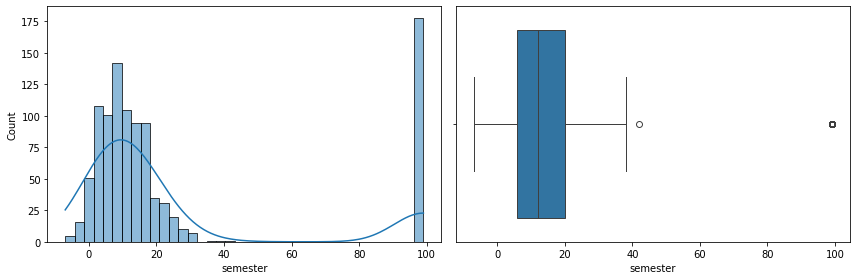

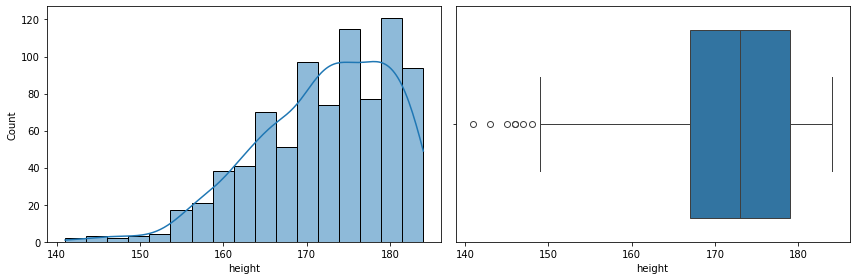

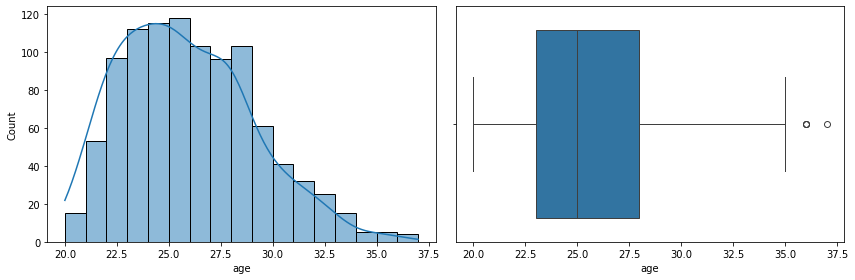

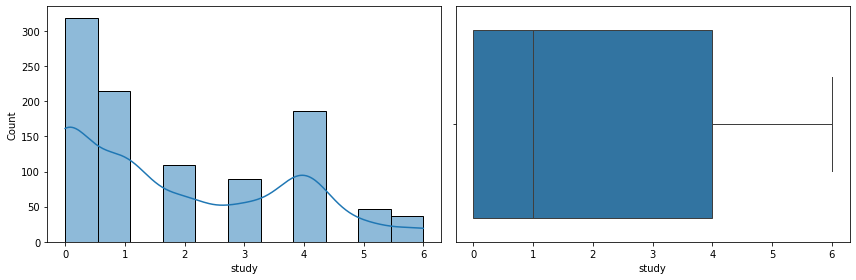

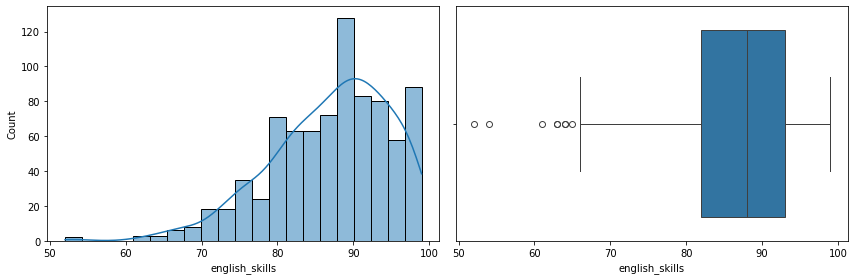

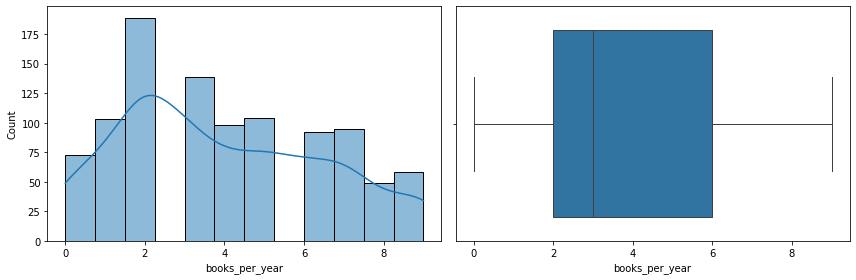

In [9]:
numeric_vals = ['semester','height','age','study',"english_skills","books_per_year"]

for col in numeric_vals:
    plt.figure(figsize=(12, 4))
    plt.subplot(1, 2, 1)
    sns.histplot(df[col], kde=True)
    plt.subplot(1, 2, 2)
    sns.boxplot(x=df[col])
    plt.tight_layout()
    plt.show()

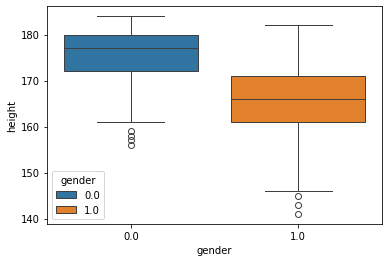

In [10]:
sns.boxplot(x=df['gender'], y=df['height'], hue = df['gender'])
plt.show()

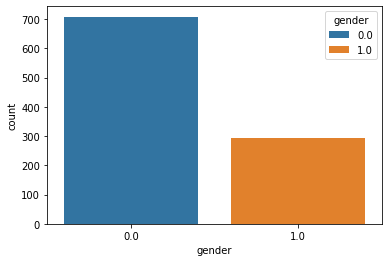

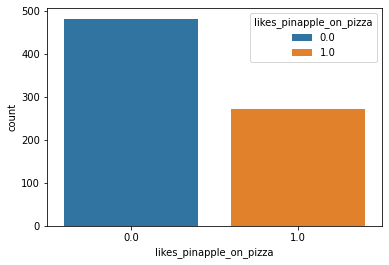

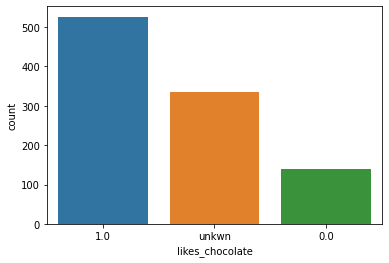

In [11]:
categorical_col = ["gender","likes_pinapple_on_pizza","likes_chocolate"]
for col in categorical_col:
    sns.countplot(x=df[col], hue = df[col])
    plt.show()

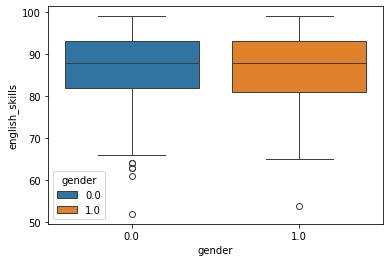

In [12]:
sns.boxplot(x=df['gender'], y=df['english_skills'], hue = df['gender'])
plt.show()

In [13]:
df = df[df['semester'] <= 40]

In [14]:
df['height'] = df.groupby('gender')['height'].transform(lambda x: x.fillna(x.median()))

In [15]:
df['english_skills'] = df['english_skills'].fillna(df['english_skills'].median())

In [16]:
df['likes_pinapple_on_pizza'] = df['likes_pinapple_on_pizza'].cat.add_categories('Unknown').fillna('Unknown')

In [17]:
df.isnull().sum()

Unnamed: 0                 0
semester                   0
gender                     0
height                     0
age                        0
study                      0
likes_pinapple_on_pizza    0
likes_chocolate            0
english_skills             0
books_per_year             0
dtype: int64

In [18]:
corr_matrix = df.corr(numeric_only=True)

In [19]:
print(corr_matrix)

                Unnamed: 0  semester    height       age     study  \
Unnamed: 0        1.000000 -0.016187 -0.027854 -0.007176 -0.017535   
semester         -0.016187  1.000000 -0.015964  0.832444 -0.054215   
height           -0.027854 -0.015964  1.000000 -0.033031  0.008315   
age              -0.007176  0.832444 -0.033031  1.000000 -0.073484   
study            -0.017535 -0.054215  0.008315 -0.073484  1.000000   
english_skills   -0.029849  0.004256 -0.015693 -0.019400  0.038328   
books_per_year   -0.040194 -0.037096 -0.039105 -0.038213 -0.044056   

                english_skills  books_per_year  
Unnamed: 0           -0.029849       -0.040194  
semester              0.004256       -0.037096  
height               -0.015693       -0.039105  
age                  -0.019400       -0.038213  
study                 0.038328       -0.044056  
english_skills        1.000000        0.088565  
books_per_year        0.088565        1.000000  


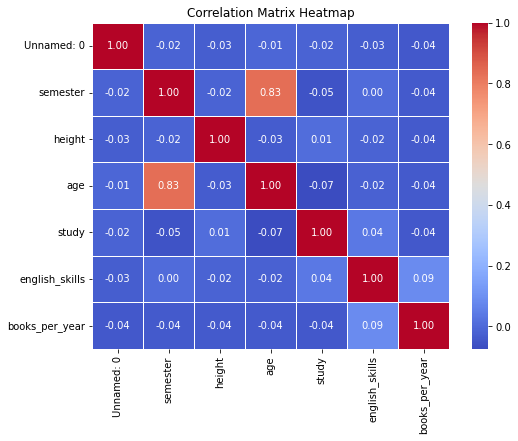

In [20]:
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5, fmt=".2f", cbar=True)
plt.title('Correlation Matrix Heatmap')
plt.show()

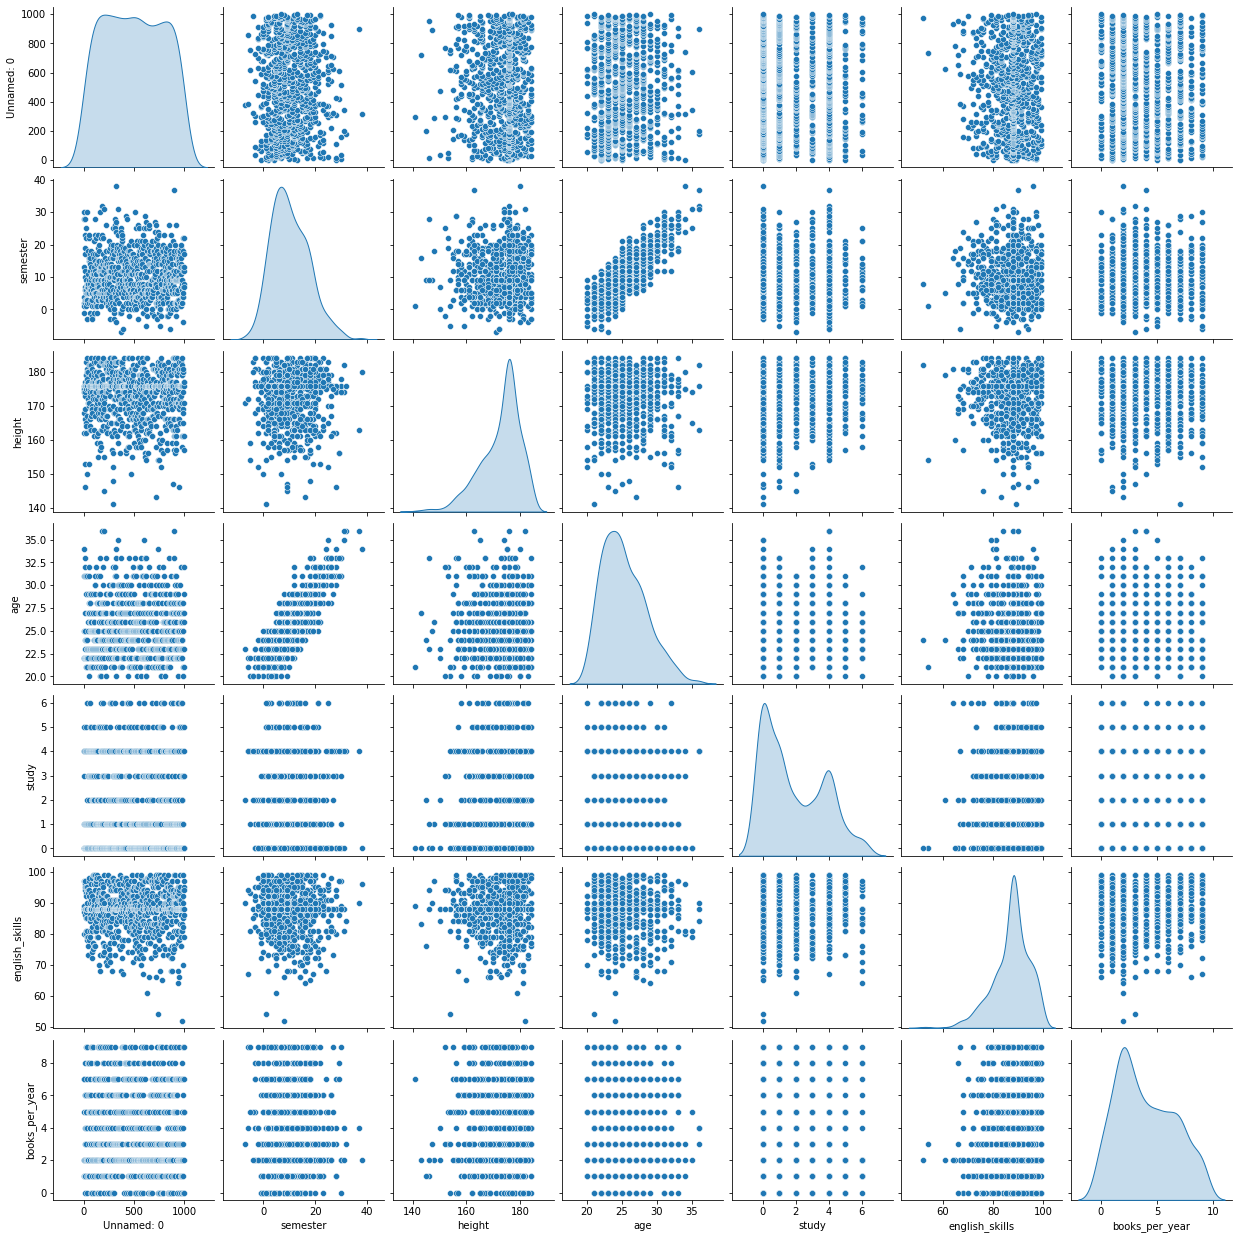

In [21]:
sns.pairplot(df, diag_kind='kde', markers='o', palette='coolwarm')

# Show the plot
plt.show()

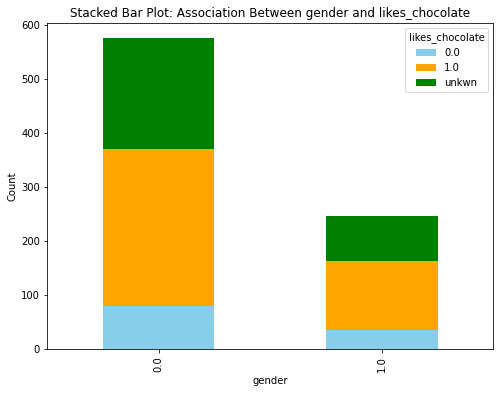

In [22]:
contingency = pd.crosstab(df['gender'], df['likes_chocolate'])

# Plot the stacked bar plot
contingency.plot(kind='bar', stacked=True, figsize=(8, 6), color=['skyblue', 'orange','green'])
plt.title('Stacked Bar Plot: Association Between gender and likes_chocolate')
plt.xlabel('gender')
plt.ylabel('Count')
plt.show()

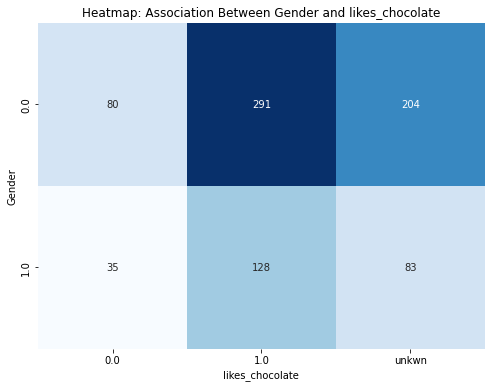

In [23]:
plt.figure(figsize=(8, 6))
sns.heatmap(contingency, annot=True, cmap='Blues', fmt='d', cbar=False)
plt.title('Heatmap: Association Between Gender and likes_chocolate')
plt.xlabel('likes_chocolate')
plt.ylabel('Gender')
plt.show()

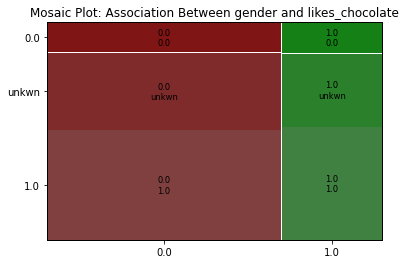

In [29]:
from statsmodels.graphics.mosaicplot import mosaic


# Create a mosaic plot
mosaic(df, ['gender', 'likes_chocolate'])
plt.title('Mosaic Plot: Association Between gender and likes_chocolate')
plt.show()

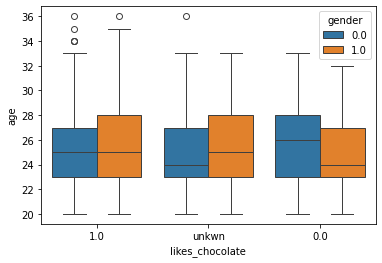

In [25]:
sns.boxplot(x=df['likes_chocolate'], y=df['age'], hue = df['gender'])
plt.show()

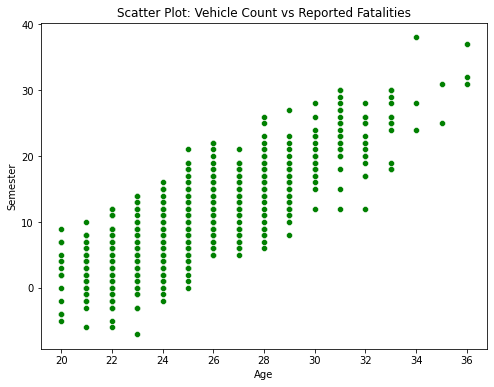

In [26]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='age', y='semester', data=df, color='green', marker='o')

# Add labels and title
plt.xlabel('Age')
plt.ylabel('Semester')
plt.title('Scatter Plot: Vehicle Count vs Reported Fatalities')

# Show plot
plt.show()

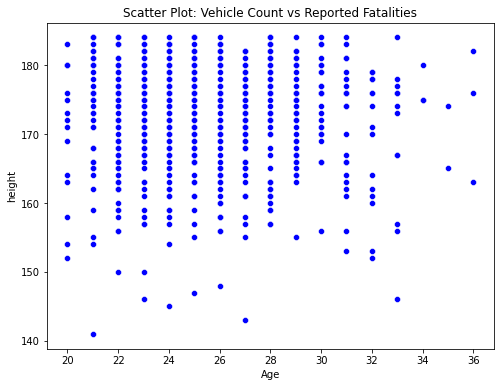

In [27]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='age', y='height', data=df, color='blue', marker='o')

# Add labels and title
plt.xlabel('Age')
plt.ylabel('height')
plt.title('Scatter Plot: Vehicle Count vs Reported Fatalities')

# Show plot
plt.show()

In [28]:
df.describe()

,Unnamed: 0,semester,height,age,study,english_skills,books_per_year
count,821.000000,821.000000,821.000000,821.000000,821.000000,821.000000,821.000000
mean,498.057247,10.343484,172.764921,25.333739,1.875761,87.133983,3.962241
std,290.732633,7.245952,7.419127,3.137996,1.819048,7.165744,2.569481
min,1.000000,-7.000000,141.000000,20.000000,0.000000,52.000000,0.000000
25%,247.000000,5.000000,169.000000,23.000000,0.000000,83.000000,2.000000
50%,495.000000,9.000000,175.000000,25.000000,1.000000,88.000000,4.000000
75%,752.000000,15.000000,177.000000,27.000000,4.000000,92.000000,6.000000
max,999.000000,38.000000,184.000000,36.000000,6.000000,99.000000,9.000000
